In [1]:
#Data Loading and Initial Inspection: The `heart_disease.csv` dataset was loaded into a pandas DataFrame. Basic information about
# the data types, non-null values, and descriptive statistics were examined.
import pandas as pd
df=pd.read_csv('heart_disease.csv')

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
#Missing values in the 'oldpeak' column were imputed using the mean of the column.
df.fillna(df['oldpeak'].mean(),inplace=True)

In [8]:
df.oldpeak

,oldpeak
0,2.300000
1,0.000000
2,0.400000
3,0.000000
4,1.500000
...,...
903,1.500000
904,3.000000
905,2.500000
906,0.891253


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [10]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [11]:
#The target variable 'num'was converted into a binary format (0 for no heart disease, 1 for heart disease).
df['num']=df['num'].apply(lambda x:1 if x>0 else 0)

In [12]:
#Exploratory Data Analysis (EDA):
     #A heatmap of the correlation matrix was generated to visualize the relationships between numerical features.
     #Count plots were created to show the distribution of the target variable and its distribution across different categorical and numerical features.
     #A box plot was used to compare the age distribution for individuals with and without heart disease.
corr_matrix=df.corr(numeric_only=True)

<Axes: >

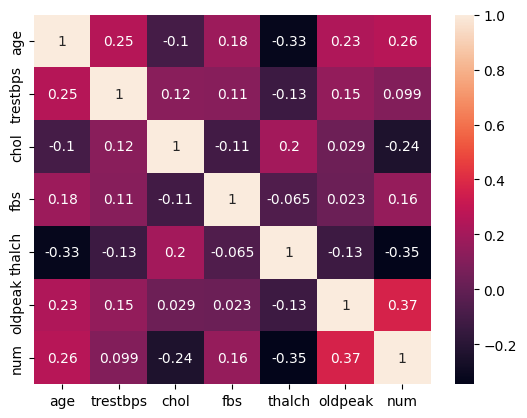

In [13]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)

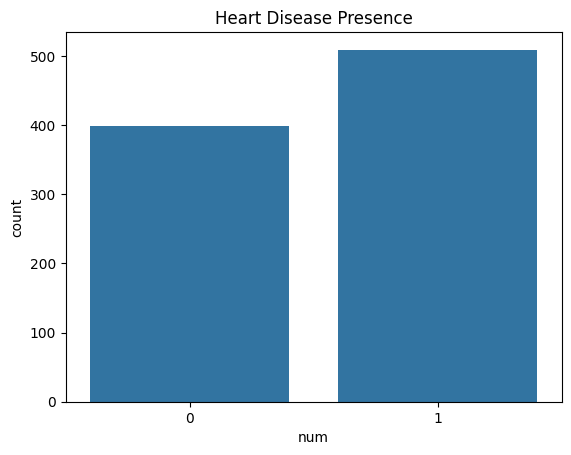

In [14]:
import matplotlib.pyplot as plt
sns.countplot(x='num', data=df)
plt.title('Heart Disease Presence')
plt.show()

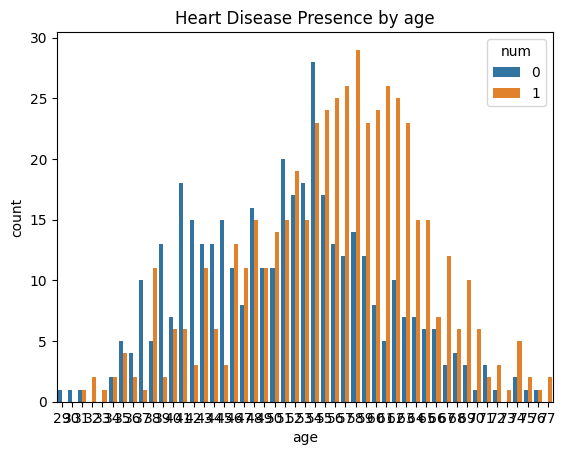

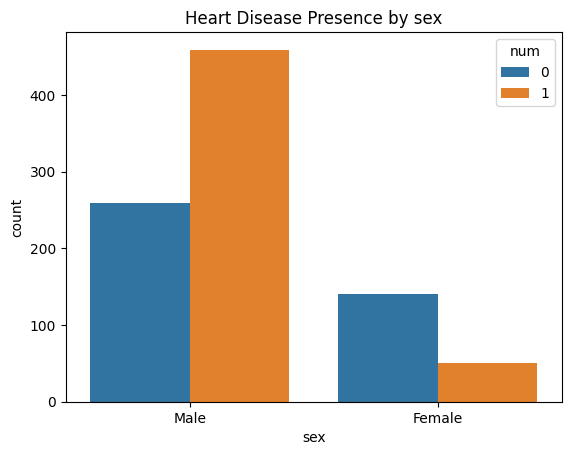

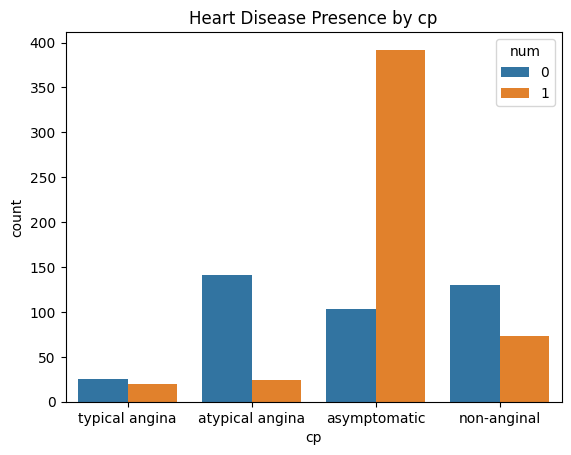

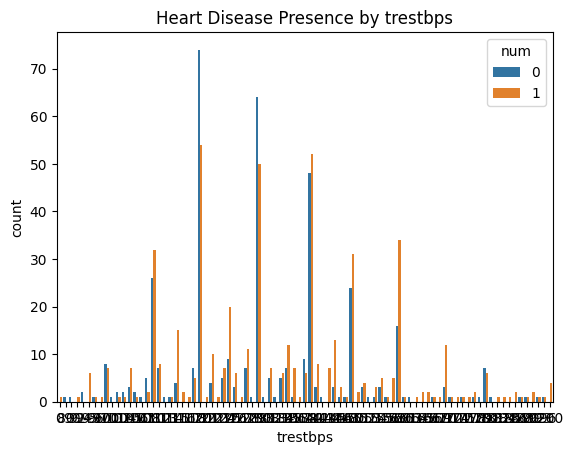

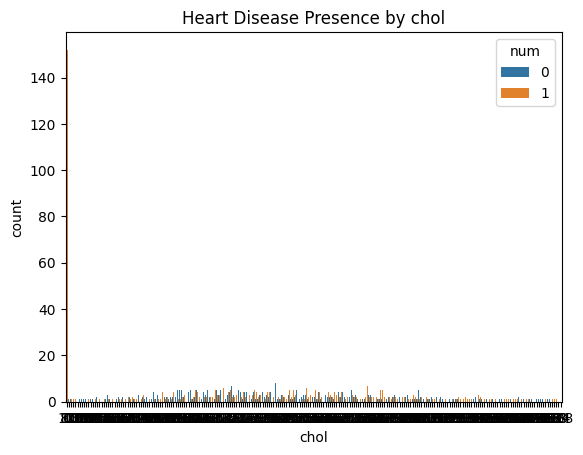

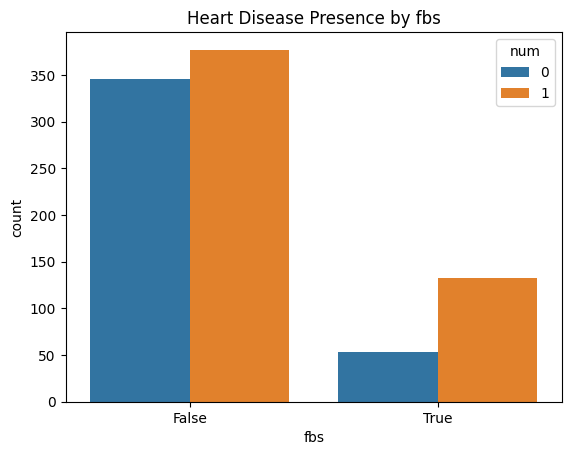

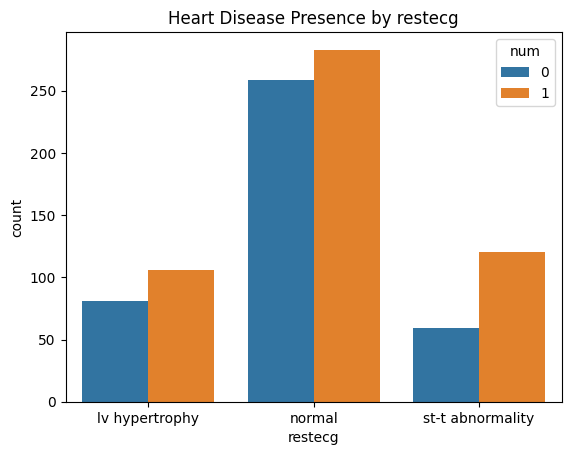

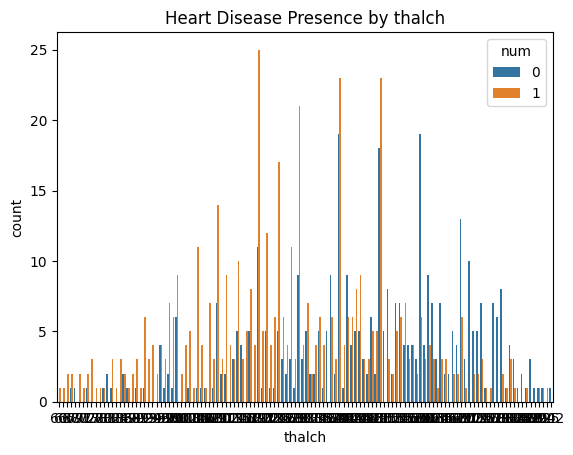

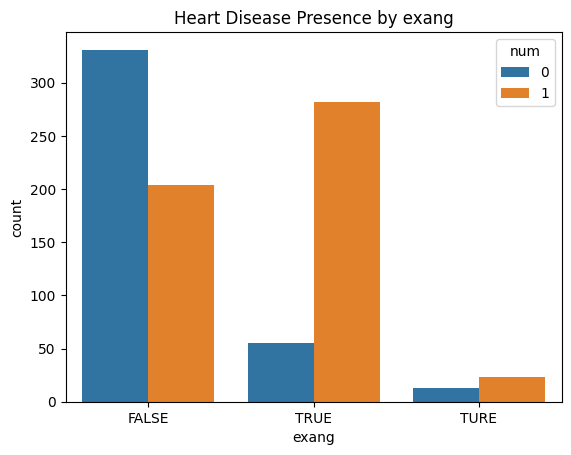

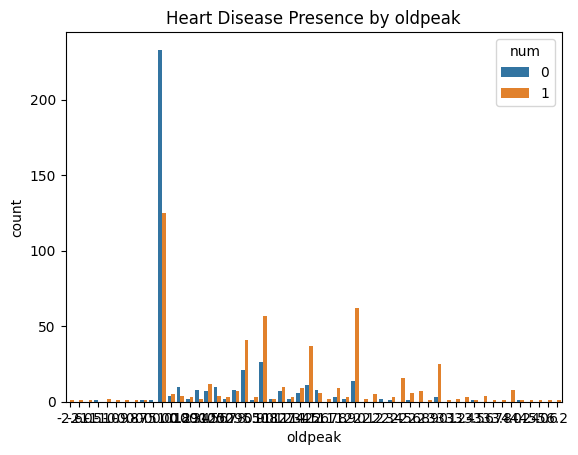

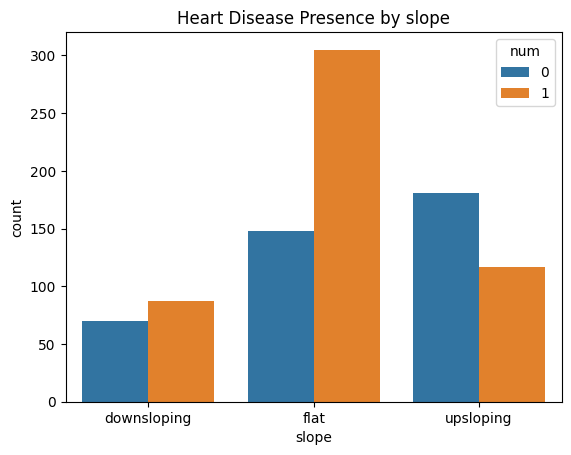

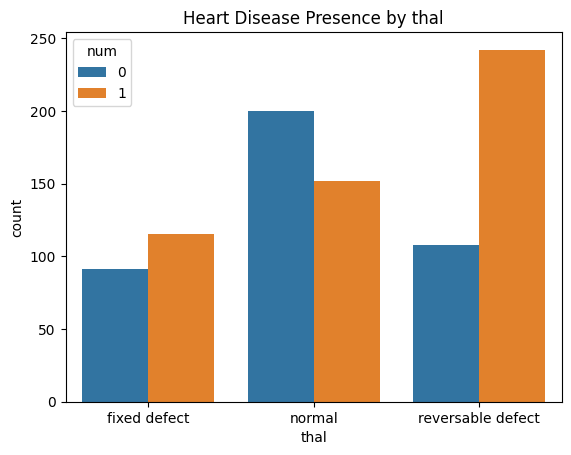

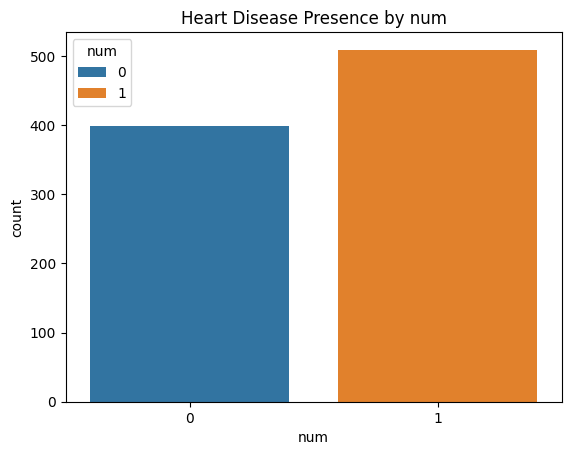

In [15]:
for col in df.columns:
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'Heart Disease Presence by {col}')
    plt.show()

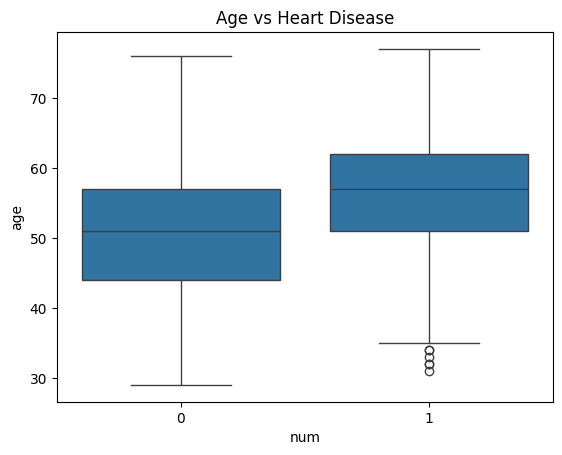

In [16]:
sns.boxplot(x='num', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

In [17]:
encoded_df=df.select_dtypes(include=['object'])

In [18]:
encoded_df

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,TRUE,flat,fixed defect
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,fixed defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,reversable defect


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for col in encoded_df.columns:
    df[col]=le.fit_transform(df[col])

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,2,1
904,62,1,0,166,170,False,2,120,1,3.000000,1,0,1
905,56,1,2,170,0,False,0,123,1,2.500000,0,0,1
906,56,1,2,144,208,True,2,105,2,0.891253,0,2,1


In [22]:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
X = df[features]
y = df['num']

In [23]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.3,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0


In [24]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,1
904,1
905,1
906,1


In [25]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.33, random_state =42)

In [26]:
X_train.shape, X_test.shape

((608, 12), (300, 12))

In [27]:
X_train.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,bool
restecg,int64
thalch,int64
exang,int64
oldpeak,float64


In [28]:


X_train.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
603,43,1,0,122,0,False,1,120,0,0.5,2,2
326,43,0,1,150,186,False,1,154,0,0.0,2,1
10,30,0,3,170,237,False,2,170,0,0.0,0,0
373,40,1,2,140,284,False,1,188,0,0.0,0,2
795,56,0,0,200,288,True,0,133,1,4.0,0,2


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier(criterion='entropy',
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2)
dTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [30]:
dTree=dTree.fit(X_train,y_train)

[Text(0.5, 0.875, 'cp <= 0.5\nentropy = 0.989\nsamples = 608\nvalue = [267, 341]'),
 Text(0.25, 0.625, 'oldpeak <= 0.7\nentropy = 0.712\nsamples = 328\nvalue = [64, 264]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'chol <= 80.0\nentropy = 0.971\nsamples = 120\nvalue = [48, 72]'),
 Text(0.0625, 0.125, 'entropy = 0.391\nsamples = 39\nvalue = [3, 36]'),
 Text(0.1875, 0.125, 'entropy = 0.991\nsamples = 81\nvalue = [45, 36]'),
 Text(0.375, 0.375, 'oldpeak <= 2.35\nentropy = 0.391\nsamples = 208\nvalue = [16, 192]'),
 Text(0.3125, 0.125, 'entropy = 0.475\nsamples = 157\nvalue = [16, 141]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(0.75, 0.625, 'thalch <= 134.5\nentropy = 0.849\nsamples = 280\nvalue = [203, 77]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'chol <= 155.0\nentropy = 1.0\nsamples = 87\nvalue = [43.0, 44.0]'),
 Text(0.5625, 0.125, 'entropy = 0.75\nsamples = 28\nvalue = [6, 22]'),
 Text(0.6875, 0.125, 'entropy = 0.953\nsamples =

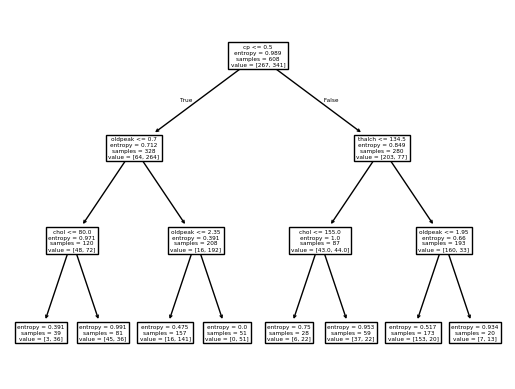

In [31]:
tree.plot_tree(dTree,feature_names=features)

In [32]:
y_pred=dTree.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score:  ", accuracy_score(y_test,y_pred))


print("Classification Report:   ",classification_report(y_test,y_pred))
print("confusion_matrix:   ",confusion_matrix(y_test,y_pred))

Accuracy score:   0.7233333333333334
Classification Report:                  precision    recall  f1-score   support

           0       0.65      0.80      0.72       132
           1       0.81      0.67      0.73       168

    accuracy                           0.72       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.74      0.72      0.72       300

confusion_matrix:    [[105  27]
 [ 56 112]]


In [35]:
y_proba = dTree.predict_proba(X_test)[:,1]

In [36]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_proba,multi_class='ovr')
print("auc score:   ", auc_score)

auc score:    0.7945752164502163


an auc score of 79 is quite decent that can distinguish between positive and negative classes but the performance is not excellent


#CONCLUSION:-

The initial accuracy_score of the model on first attempt is 52,which is a decent score but can be worked
on.
The score was 72% after some minor changes from multi class classification to binary classification

Decision tree classifier might not be a good fit for the dataset.
Recommended model  woould be random forest classifier or xgboost
The target variable is highly imbalanced

The model is either underfitting or overfitting and biased


#Interview Questions

##What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


  Common Hyperparameters of Decision Tree Models Decision Trees have several hyperparameters that can significantly impact their performance. Here are some common ones:

  max_depth: The maximum depth of the tree. Increasing this value can lead to overfitting, while decreasing it can lead to underfitting.

  min_samples_split: The minimum number of samples required to split an internal node. Increasing this value can prevent overfitting.

  min_samples_leaf: The minimum number of samples required to be at a leaf node. Increasing this value can prevent overfitting.

  criterion: The function to measure the quality of a split. Common criteria include Gini impurity and entropy.

  max_features: The maximum number of features to consider when looking for the best split.


##What is the difference between the Label encoding and One-hot encoding?



  Label Encoding vs One-hot Encoding Both Label Encoding and One-hot Encoding are used to convert categorical variables into numerical variables that can be processed by machine learning algorithms.

   Label Encoding: Assigns a unique integer value to each category. This can imply an order between categories, which may not be desirable.
  
   One-hot Encoding: Creates a new binary feature for each category. This avoids implying an order between categories but can lead to the dummy variable trap.



In [37]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy: 0.7795691640699092


#PRUNING

In [41]:

best_params = grid_search.best_params_
pruned_dTree = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

pruned_dTree.fit(X_train, y_train)

y_pred_pruned = pruned_dTree.predict(X_test)
print("\nResults with Pruned Decision Tree (using best parameters from GridSearchCV):")
print("Accuracy score:  ", accuracy_score(y_test, y_pred_pruned))
print("Classification Report:   ", classification_report(y_test, y_pred_pruned))
print("confusion_matrix:   ", confusion_matrix(y_test, y_pred_pruned))
y_proba_pruned = pruned_dTree.predict_proba(X_test)[:, 1]
auc_score_pruned = roc_auc_score(y_test, y_proba_pruned, multi_class='ovr')
print("auc score:   ", auc_score_pruned)


Results with Pruned Decision Tree (using best parameters from GridSearchCV):
Accuracy score:   0.7233333333333334
Classification Report:                  precision    recall  f1-score   support

           0       0.65      0.80      0.72       132
           1       0.81      0.67      0.73       168

    accuracy                           0.72       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.74      0.72      0.72       300

confusion_matrix:    [[105  27]
 [ 56 112]]
auc score:    0.7945752164502163


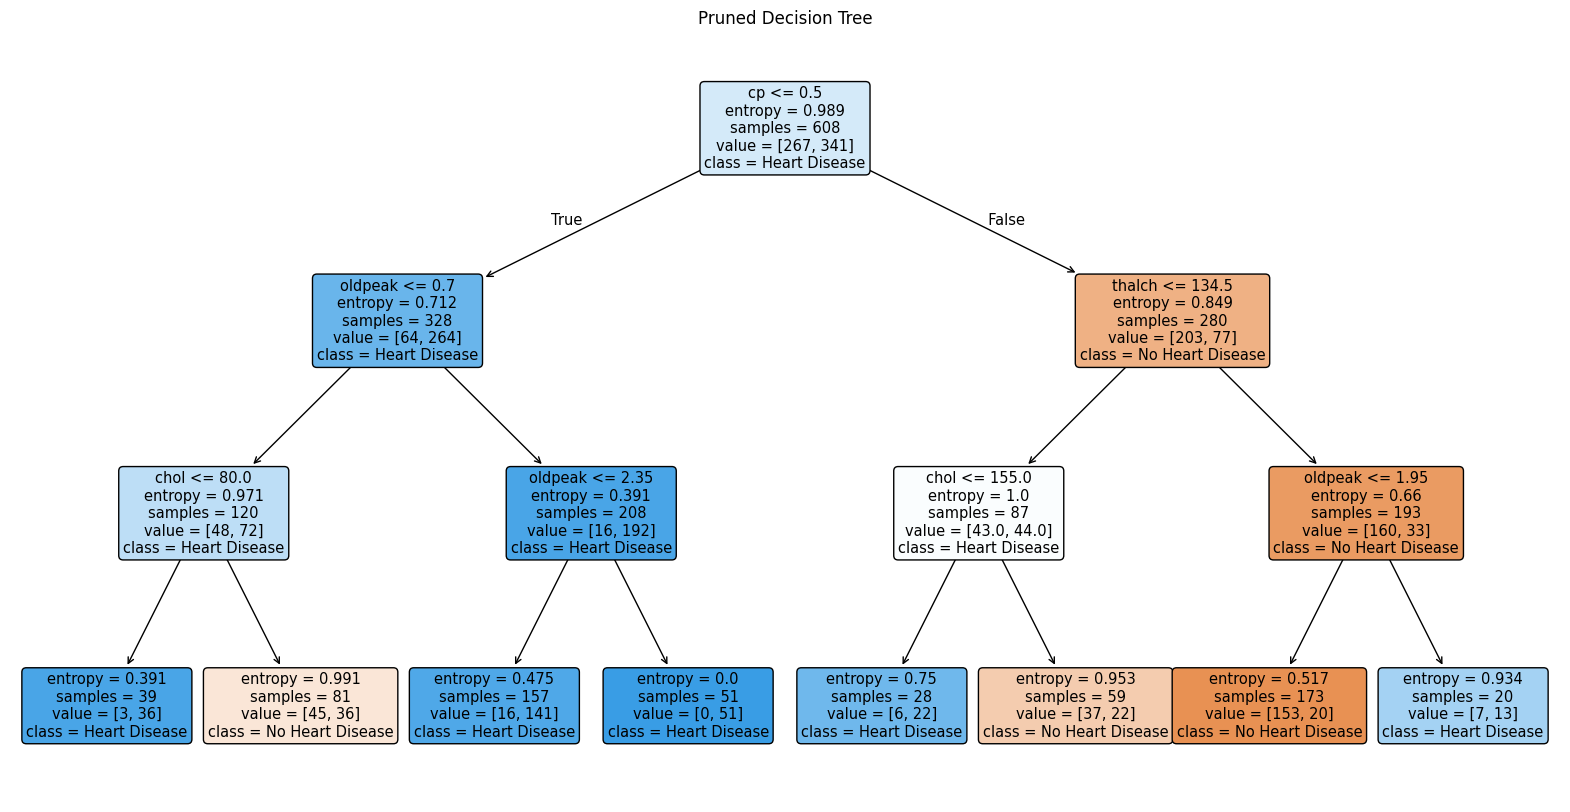

In [42]:
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_dTree, feature_names=features, filled=True, rounded=True, class_names=['No Heart Disease', 'Heart Disease'])
plt.title('Pruned Decision Tree')
plt.show()